In [10]:
import os
import cv2
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.base
import bhtsne
from sklearn.cluster import KMeans




# データの読み込み

In [122]:
image_list = []
for file in sorted(glob.glob('/home/morinaga/work/faceImage/001/*.jpg')):
    image_list.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE).flatten())
images = np.asarray(image_list)
subset=images[::10,:] # 10 frame間隔で間引いてデータ数を減らす

# TSNE により２次元に圧縮する

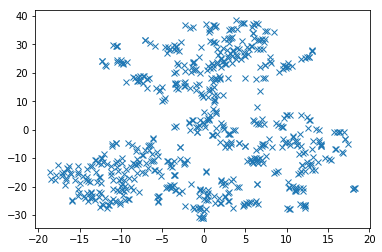

In [123]:
class BHTSNE(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):

    def __init__(self, dimensions=2, perplexity=30.0, theta=0.5, rand_seed=-1):
        self.dimensions = dimensions
        self.perplexity = perplexity
        self.theta = theta
        self.rand_seed = rand_seed

    def fit_transform(self, x):
        return bhtsne.tsne(
            x.astype(np.float64), dimensions=self.dimensions, perplexity=self.perplexity, theta=self.theta,
            rand_seed=self.rand_seed)
sne=BHTSNE()
x=sne.fit_transform(subset)
plt.plot(x[:,0],x[:,1],'x')

# k-means法によるクラスタリング

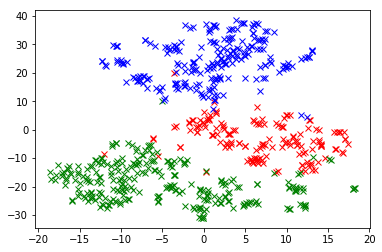

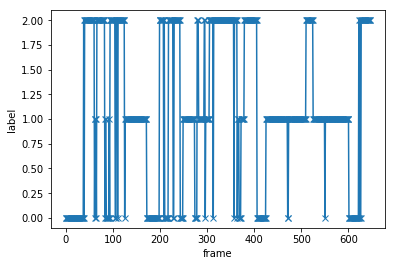

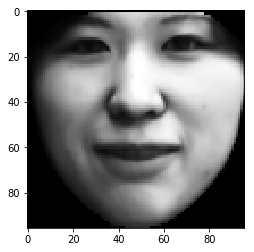

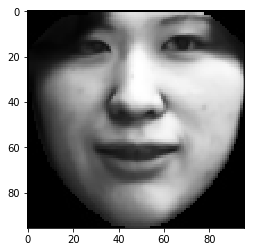

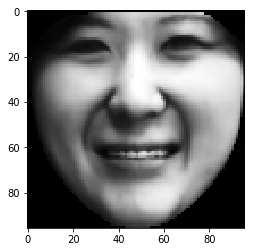

In [124]:
from sklearn.cluster import KMeans
n_clusters=3 # number of clusters
pred = KMeans(n_clusters=n_clusters).fit_predict(subset)
colors=['r','g','b','k','y','m'] #colors
for i in range(n_clusters):
    plt.plot(x[pred==i,0], x[pred==i,1],colors[i]+'x')
plt.figure()
plt.plot(pred,'-x')
plt.xlabel('frame')
plt.ylabel('label')
for i in range(n_clusters):
    plt.figure()
    plt.imshow(subset[pred==i].mean(0).reshape(96,96))


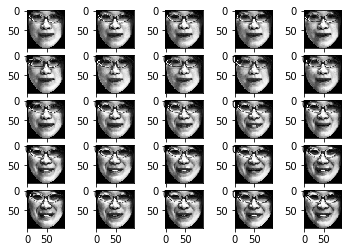

In [118]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(subset[i].reshape(96,96))


/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/mnt/aoni03/tawara/miniconda3/lib/python3.7/site-pa

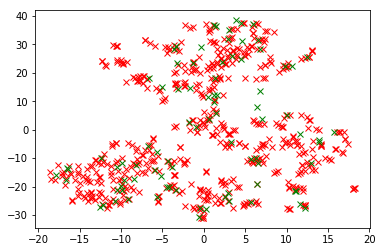

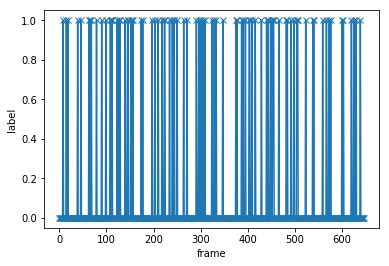

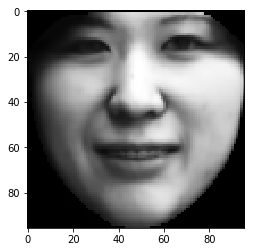

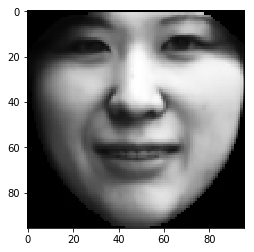

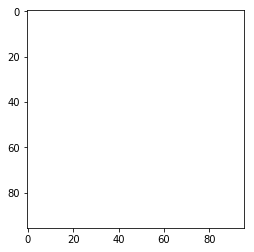

In [132]:
from sklearn.cluster import SpectralClustering
pred = SpectralClustering(n_clusters=2, random_state=0).fit_predict(subset)
#pred=clustering.labels_
for i in range(n_clusters):
    plt.plot(x[pred==i,0], x[pred==i,1],colors[i]+'x')
plt.figure()
plt.plot(pred,'-x')
plt.xlabel('frame')
plt.ylabel('label')
for i in range(n_clusters):
    plt.figure()
    plt.imshow(subset[pred==i].mean(0).reshape(96,96))

In [131]:
clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,